In [7]:
pip install -U fortran-magic

In [8]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [9]:
%reload_ext fortranmagic

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [10]:
assert ran_the_first_cell, "Oh noes!"

In [11]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [12]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [13]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [14]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [15]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [16]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [17]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [18]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [19]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [20]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [21]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [22]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [23]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [24]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [25]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [26]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [29]:
%%time

matmul(a, b)

CPU times: user 22 µs, sys: 0 ns, total: 22 µs
Wall time: 24.8 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [28]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 49
model name	: AMD EPYC 7B12
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2249.998
cache size	: 512 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid tsc_known_freq pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm cmp_legacy cr8_legacy abm sse4a misalignsse 3dnowprefetch osvw topoext ssbd ibrs ibpb stibp vmmcall fsgsbase tsc_adjust bmi1 avx2 smep bmi2 rdseed adx smap clflushopt clwb sha_ni xsaveopt xsavec xgetbv1 clzero xsaveerptr arat npt nrip_save umip rdpid
bugs		: sysret_ss_attrs null_seg spectre_v1 spectre_v2 spec_store_bypass retbleed smt_rsb
bogomips	: 4499.

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [30]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [31]:
matmul(a, b)

IndexError: ignored

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [33]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    if(len(a[0]) == len(b)):

      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out

    else:
      print("Las matrices ahora ya no se pueden multiplicar.")


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [34]:
matmul(a, b)

Las matrices ahora ya no se pueden multiplicar.


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [36]:
a = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9],
     [1, 2, 1]]

b = [[10, 5, 1, 0],
     [2, 4, 6, 8],
     [7, 13, 17, 23]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [37]:
matmul(a,b)

[[35, 52, 64, 85], [92, 118, 136, 178], [149, 184, 208, 271], [21, 26, 30, 39]]

In [38]:
import random

In [39]:
random.normalvariate(0,1)

3.1907654641837286

In [43]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

mat_random = random_matrix(2, 3)
mat_random

[[0.495750485924092, 0.19296284781582218, 0.5875695011580454],
 [0.900210547642458, 0.6618124500171542, 0.6852641188008541]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [41]:
randa = random_matrix(600,100)
randb = random_matrix(100,600)
import time
t = 0
for i in range(0, 10):
  s = time.time()
  x = matmul(randa, randb)
  p = time.time()-s
  t = t + p
t = t / 10
t

5.2024394273757935

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [44]:
import pandas as pd
time_df = pd.DataFrame([t],index=['Python'],columns=['Average'])
time_df

,Average
Python,5.202439


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [45]:
import time
import numpy as np
tr=0
for i in range(0,10):
  randa = np.array(random_matrix(600, 100))
  randb = np.array(random_matrix(100, 600))
  s = time.time()
  x = np.matmul(randa, randb)
  p = time.time()-s
  tr = tr + p
tr = tr/10
time_df = pd.DataFrame([t,tr],index=['Python','NumPy'],columns=['Average'])
time_df

,Average
Python,5.202439
NumPy,0.002853


In [46]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 5.06 s, sys: 12.2 ms, total: 5.07 s
Wall time: 5.08 s


In [51]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [56]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [55]:
%fortran_config --clean-cache

Clean cache: /root/.cache/ipython/fortranmagic/d3e94304


In [57]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [58]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 8.93 ms, sys: 0 ns, total: 8.93 ms
Wall time: 11.8 ms


333328333350000.0

In [59]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 103 µs, sys: 3 µs, total: 106 µs
Wall time: 109 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [63]:
A = [[23, 29],
     [2, 7]]

B = [[5, 3],
     [11, 13]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [64]:
%%fortran
subroutine fortran_matmul(A,B,R)
    implicit none
    double precision, intent(in) :: A(2,*)
    double precision, intent(in) :: B(2,*)
    double precision, intent(out) :: R(2,2)
    integer I,J,K,aux
    do I=1,2
      do J=1,2
        R(I,J)=0
        do K=1,2
          R(I,J) = R(I,J) + A(I,K) * B(K,J)
        end do
      end do
    end do
end

The extension _fortran_magic_99b5d2035cd92f1e61c008bf200b25df is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [65]:
fortran_matmul(A, B)

array([[434., 446.],
       [ 87.,  97.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [66]:
%%fortran
subroutine fortran_matmulti(A,B,N,L,M,R)
    implicit none
    integer, intent(in) :: N,L,M
    double precision, intent(in) :: A(600,*)
    double precision, intent(in) :: B(100,*)
    double precision, intent(out) :: R(N,M)
    integer I,J,K,aux
    do I=1,N
      do J=1,M
        R(I,J)=0
        do K=1,L
          R(I,J) = R(I,J) + A(I,K) * B(K,J)
        end do
      end do
    end do
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [67]:
import numpy as np
A1 = np.array(random_matrix(600,100))
A2 = np.array(random_matrix(100,600))

N=len(A1)
L=len(A1[0])
M=len(A2[0])

fortran_matmulti(A1,A2,N,L,M)

array([[25.71942809, 25.54936784, 25.79808737, ..., 24.57928436,
        28.95177308, 23.49510516],
       [23.4239516 , 21.48214601, 24.06844592, ..., 21.33172676,
        26.67208178, 21.76289581],
       [26.7620928 , 26.59282118, 27.7744348 , ..., 26.39308317,
        29.56355113, 23.08576823],
       ...,
       [24.70226787, 25.914234  , 25.08621704, ..., 22.38721489,
        28.57428681, 21.68510093],
       [26.41987399, 25.68342006, 26.10729229, ..., 24.79817392,
        30.24002323, 23.74262948],
       [24.94566395, 25.46096796, 25.64450168, ..., 25.1307342 ,
        28.9034873 , 23.07864413]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [68]:
%%time
for i in range(0,10):
  fortran_matmulti(A1,A2,N,L,M)

CPU times: user 310 ms, sys: 3.86 ms, total: 314 ms
Wall time: 322 ms


In [69]:
mf = 0
for i in range(10):
  start_time = time.time()
  fortran_matmulti(A1,A2,N,L,M)
  v = time.time() - start_time
  mf = mf + v

mf = mf/10
time_df = pd.DataFrame([t,tr,mf],index=['Python','NumPy','Fortran Magic'],columns=['Average'])
time_df

,Average
Python,5.202439
NumPy,0.002853
Fortran Magic,0.027547


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [71]:
%%fortran

subroutine matmul20(A,B,N,L,M,R)
  implicit none
  integer,intent(in) :: N,L,M
  double precision, intent(in) :: A(600,*)
  double precision, intent(in) :: B(100,*)
  double precision, intent(out) :: R(N,M)
  integer I,X,J,K,aux
  do X=0, 10
    do I=1,N
      do J=1,M
        R(I,J)=0
        do K=1,L
          R(I,J) = R(I,J) + A(I,K)*B(K,J)

        end do
      end do
    end do
  end do
end

The extension _fortran_magic_21d9d35d542b2f0c4857e607bfa3ec79 is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [72]:
A1 = np.array(random_matrix(600,100))
A2 = np.array(random_matrix(100,600))

N=len(A1)
L=len(A1[0])
M=len(A2[0])

matmul20(A1,A2,N,L,M)
md = 0
for i in range(10):
  start_time = time.time()
  matmul20(A1,A2,N,L,M)
  v = time.time() - start_time
  md = md+v

md = md/10

**My own example 18 - Adding Fortran average execution time to the data frame**

In [74]:
time_df = pd.DataFrame([t,tr,mf,md],index=['Python','NumPy','Fortran Magic','Fortran'],columns=['Average'])
time_df

,Average
Python,5.202439
NumPy,0.002853
Fortran Magic,0.027547
Fortran,0.299444


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [75]:
%%writefile mult_matrix.c
#include "iostream"
#include<stdio.h>
#include<stdlib.h>
#include<time.h>
#include <ctime>

using namespace std;
int main()
{

 srand(time(0));

 int matrixA[600][100], i ,j;

 for (i = 0; i < 600; ++i){
   for (j = 0;  j < 100; ++j){
    matrixA[i][j] = rand()%200;
   }

  }

int matrixB[100][600];
 for (i = 0; i < 100; i++){
      for (j = 0;  j < 600; j++){
        matrixB[i][j] = rand()%200;
        }
  }

float mc,t0,t1;
int t, mult[600][600];
for (t = 0; t<10; t++){
 t0=clock();

 for (int i = 0; i <600 ; i++)
 {
   for (int j = 0; j < 600; j++){

     for (int k = 0; k < 100; k++){

      mult[i][j] +=  matrixA[i][k] * matrixB[k][j];

     }

   }

 }
    t1 = clock();
    double time = (double(t1-t0)/CLOCKS_PER_SEC);

    mc = mc+time;
}
mc = mc/10;
cout << mc;

   return 0;
  }



Writing mult_matrix.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [76]:
!g++ mult_matrix.c && ./a.out

0.1255

**My own example 21 - Adding c average execution time to the data frame**

In [77]:
time_df = pd.DataFrame([t,tr,mf,md,0.164],index=['Python','NumPy','Fortran Magic','Fortran','C'],columns=['Average'])
time_df

,Average
Python,5.202439
NumPy,0.002853
Fortran Magic,0.027547
Fortran,0.299444
C,0.164000


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [78]:
%%writefile mult_matrix.cpp
#include "iostream"
#include<stdio.h>
#include<stdlib.h>
#include<time.h>
#include <ctime>

using namespace std;
int main()
{

 srand(time(0));

 int matrixA[600][100], i ,j;

 for ( i = 0; i < 600; ++i){
   for ( j = 0;  j < 100; ++j){
    matrixA[i][j] = rand()%200;
   }

  }


int matrixB[100][600];
 for ( i = 0; i < 100; i++){
      for( j = 0;  j < 600; j++){
        matrixB[i][j] = rand()%200;
        }
  }

float mc,t0,t1;
int t, mult[600][600];
for (t = 0; t<10; t++){
 t0=clock();

 for (int i = 0; i <600 ; i++)
 {
   for (int j = 0; j < 600; j++){

     for (int k = 0; k < 100; k++){

      mult[i][j] +=  matrixA[i][k] * matrixB[k][j];

     }

   }

 }
    t1 = clock();
    double time = (double(t1-t0)/CLOCKS_PER_SEC);

    mc=mc+time;
}
mc=mc/10;
cout << mc;


   return 0;
  }

Writing mult_matrix.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [79]:
!g++ mult_matrix.cpp && ./a.out

0.144073

**My own example 24 - Adding C++ average execution time to the data frame**

In [80]:
time_df = pd.DataFrame([t,tr,mf,md,0.164,0.253],index=['Python','NumPy','Fortran Magic','Fortran','C','C++'],columns=['Average'])
time_df

,Average
Python,5.202439
NumPy,0.002853
Fortran Magic,0.027547
Fortran,0.299444
C,0.164000
C++,0.253000


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [81]:
%%writefile Main.java
import java.util.concurrent.*;
class Main{
  public static void main(String[] args){
    long media = 0;
    double respuesta = 0;
    int contador = 0;
    //matrices
    int a [][]= new int[600][100];
    int b [][] =new int[100][600];
    for(int x=0; x<a.length;x++){
      for(int y=0;y<a[x].length;y++){
        a[x][y] = (int) (Math.random()*999+1);
          }
        }
    for(int x=0; x<b.length;x++){
      for(int y=0;y<b[x].length;y++){
        b[x][y] = (int) (Math.random()*999+1);
          }
        }
    int[][] c = new int[a.length][b[0].length];
    for(contador=0;contador<10;contador++){
      long tiempo1 =System.currentTimeMillis();
      for(int i=0;i<c.length;i++){
          for(int j=0;j<c[0].length;j++){
            for(int k=0;k<b.length;k++){
              c[i][j]+=a[i][k]*b[k][j];
            }
          }
        }
      long tiempo2=System.currentTimeMillis();
      long tiempofinal = tiempo2 - tiempo1;
      media += tiempofinal;

    }
    respuesta= (media/10);
    respuesta= respuesta*(0.001);
    System.out.println(respuesta);
  }
}

Writing Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [82]:
!javac Main.java

!java Main

0.036000000000000004


**My own example 27 - Adding Java average execution time to the data frame**

In [83]:
time_df = pd.DataFrame([t,tr,mf,md,0.164,0.253,0.053],index=['Python','NumPy','Fortran Magic','Fortran','C','C++','Java'],columns=['Average'])
time_df

,Average
Python,5.202439
NumPy,0.002853
Fortran Magic,0.027547
Fortran,0.299444
C,0.164000
C++,0.253000
Java,0.053000


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [84]:
%%writefile tmp.js

var MatrizA = []

for (var i = 0; i < 600; i++) {
  a=Array.from({length: 100}, () => (Math.random() * 80));
  MatrizA.push(a)
}
var MatrizB = []
for (var i = 0; i < 100; i++) {
  x=Array.from({length: 600}, () => (Math.random() * 80));
  MatrizB.push(x)
}
tiempito=0
for(i=0; i<10;i++){
    var start = new Date().getTime();
    var matm= new Array(MatrizA.length);
      for (x=0; x<matm.length;x++)
        matm[x] = new Array(MatrizB[0].length).fill(0);
      for (x=0; x < matm.length; x++) {
        for (y=0; y < matm[x].length; y++) {
            for (z=0; z<MatrizA[0].length; z++) {
               matm [x][y] = matm [x][y] + MatrizA[x][z]*MatrizB[z][y];
        }
    }
}
    var end = new Date().getTime();
    tiempito +=(end-start)
}
console.log(`Average time: ${tiempito/10} ms`)

Writing tmp.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [85]:
!node tmp.js

Average time: 195.4 ms


**My own example 30 - Adding Javascript average execution time to the data frame**

In [86]:
time_df = pd.DataFrame([t,tr,mf,md,0.164,0.253,0.053, 0.37],index=['Python','NumPy','Fortran Magic','Fortran','C','C++','Java','JavaScript'],columns=['Average'])
time_df

,Average
Python,5.202439
NumPy,0.002853
Fortran Magic,0.027547
Fortran,0.299444
C,0.164000
C++,0.253000
Java,0.053000
JavaScript,0.370000


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [87]:
min = time_df['Average'].min()
min

0.002852940559387207

**My own example 32 - Adding the Speed factor columne to the data frame**

In [88]:
fac = (time_df['Average']/min)
time_df['Speed factor']=fac

time_df

,Average,Speed factor
Python,5.202439,1823.535864
NumPy,0.002853,1.000000
Fortran Magic,0.027547,9.655560
Fortran,0.299444,104.959619
C,0.164000,57.484549
C++,0.253000,88.680432
Java,0.053000,18.577324
JavaScript,0.370000,129.690750


**My own example 33 - Sorting the the data frame by average execution time**

In [89]:
time_df = time_df.sort_values('Average')
time_df

,Average,Speed factor
NumPy,0.002853,1.000000
Fortran Magic,0.027547,9.655560
Java,0.053000,18.577324
C,0.164000,57.484549
C++,0.253000,88.680432
Fortran,0.299444,104.959619
JavaScript,0.370000,129.690750
Python,5.202439,1823.535864


## Why is the Python Version so Much Slower?

In [90]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [91]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [92]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [93]:
data + data

array([2, 4, 6, 8])

In [94]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.05 ms, sys: 2 µs, total: 1.05 ms
Wall time: 1.07 ms


333328333350000.0

In [95]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.74 ms, sys: 3.01 ms, total: 4.75 ms
Wall time: 4.85 ms


333328333350000.0

In [96]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 365 µs, sys: 9 µs, total: 374 µs
Wall time: 499 µs


333328333350000.0

In [97]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [98]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [99]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [100]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [101]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [102]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [103]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [104]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [105]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [106]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [107]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [108]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [109]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [110]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [111]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [112]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [113]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [114]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [115]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [116]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [117]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [118]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [119]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [120]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [121]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [122]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [123]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [124]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [125]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [126]:
variance(np.random.standard_normal(1000))

0.9815685695283203

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [127]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [128]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [129]:
data.mean()

14.5

In [130]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [131]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [132]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [133]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [134]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [135]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [136]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [137]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [138]:
# ... or by label.
s.loc['a']

1

In [139]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [140]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [141]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [142]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [143]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [144]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [145]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [151]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [152]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [153]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

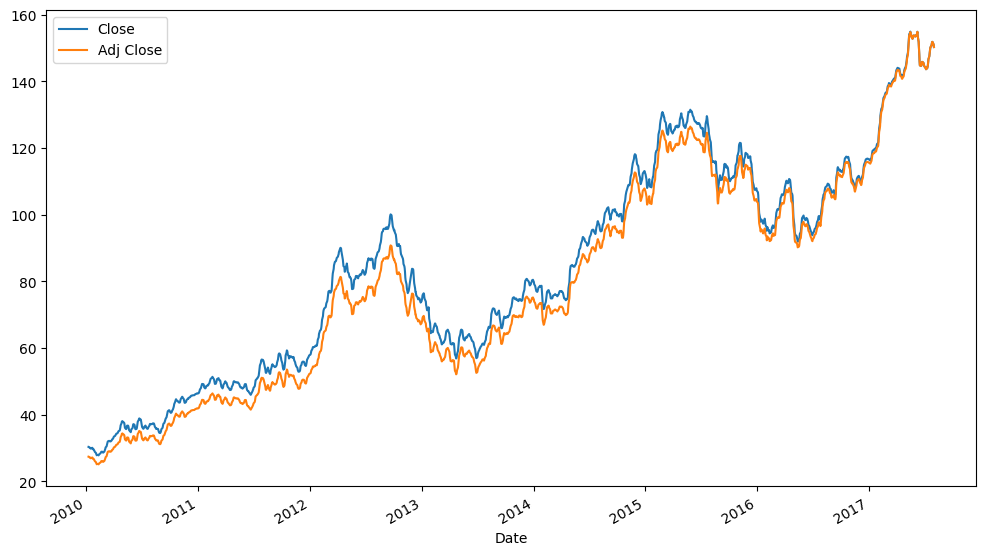

In [154]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

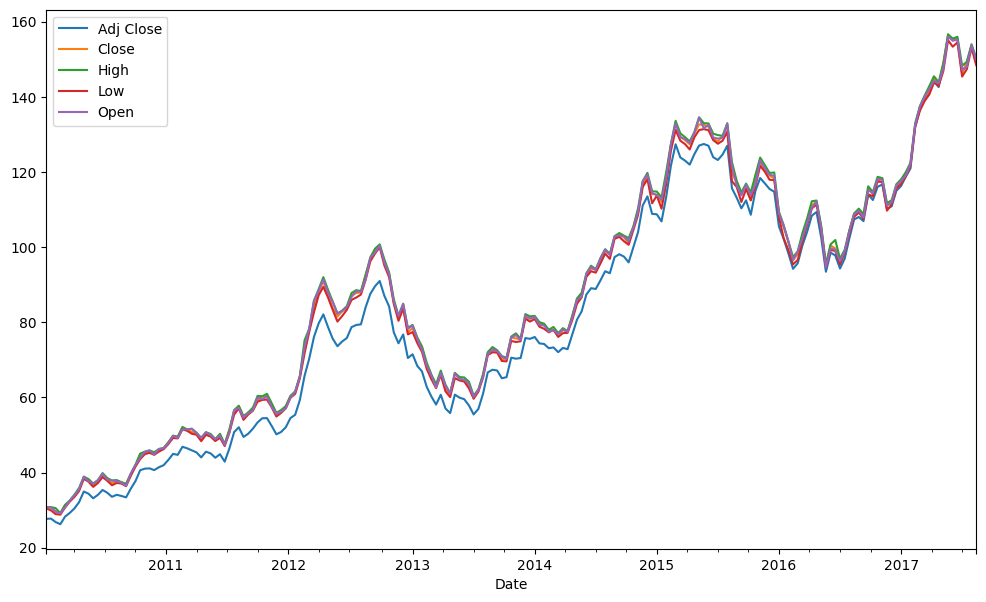

In [155]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

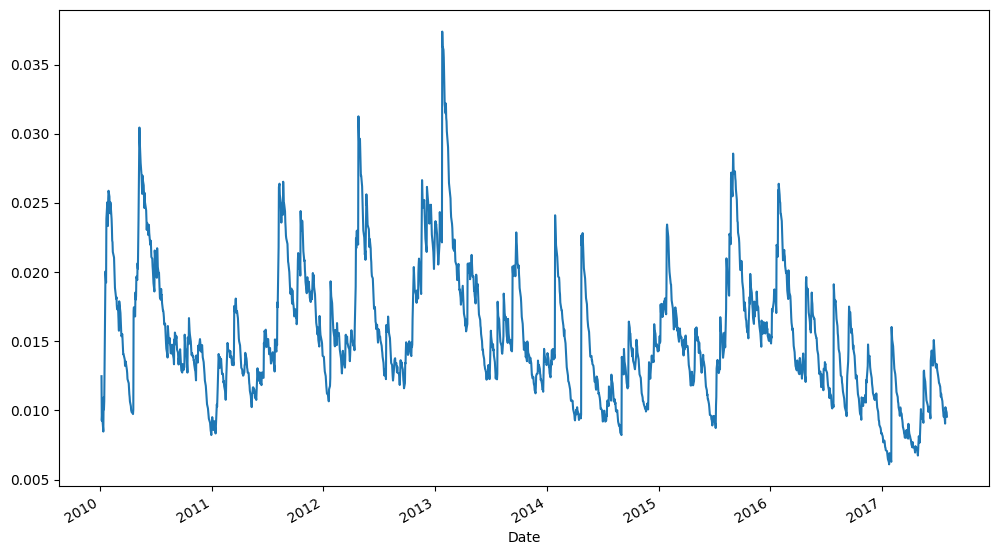

In [156]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [162]:
!git clone https://github.com/ssanderson/pydata-toolbox

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 88 (delta 22), reused 14 (delta 8), pack-reused 52
Receiving objects: 100% (88/88), 11.87 MiB | 32.25 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [164]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [166]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: ignored

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

**My example 34: Analysis similar to the one performed with the avocados**

In [ ]:
import pandas as pd
Saber_11 = pd.read_csv("Saber_11__2019-2.csv", decimal=',')
Saber_11

In [ ]:
Saber_11.head()

In [ ]:
Saber_11.columns

In [ ]:
Saber_11.info()

In [ ]:
vars = ['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_TIENEETNIA', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',
       'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_NOMBRE_ESTABLECIMIENTO',
       'COLE_GENERO', 'COLE_NATURALEZA', 'COLE_CALENDARIO', 'COLE_BILINGUE',
       'COLE_CARACTER', 'COLE_COD_DANE_SEDE', 'COLE_NOMBRE_SEDE',
       'COLE_SEDE_PRINCIPAL', 'COLE_AREA_UBICACION', 'COLE_JORNADA',
       'COLE_COD_MCPIO_UBICACION', 'COLE_MCPIO_UBICACION',
       'COLE_COD_DEPTO_UBICACION', 'COLE_DEPTO_UBICACION',
       'ESTU_PRIVADO_LIBERTAD', 'ESTU_COD_MCPIO_PRESENTACION',
       'ESTU_MCPIO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION',
       'ESTU_COD_DEPTO_PRESENTACION', 'PUNT_LECTURA_CRITICA',
       'PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA',
       'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS',
       'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES',
       'PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS',
       'DESEMP_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PERCENTIL_INGLES',
       'DESEMP_INGLES', 'PUNT_GLOBAL', 'PERCENTIL_GLOBAL',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL',
       'ESTU_NSE_ESTABLECIMIENTO', 'ESTU_ESTADOINVESTIGACION',
       'ESTU_GENERACION-E']

for i in vars:
  Saber_11 = Saber_11[Saber_11[i].notna()]

In [ ]:
Saber_11.shape

In [ ]:
for col in Saber_11.select_dtypes(include='object').columns:
    print(col)
    print(Saber_11[col].unique())

In [ ]:
for column in Saber_11.columns:
    print(column, Saber_11[column].nunique())

In [ ]:
Saber_11 = Saber_11.astype({'ESTU_COD_RESIDE_MCPIO': 'int'})

Saber_11.info()

In [ ]:
Saber_11['ESTU_COD_RESIDE_MCPIO'] = Saber_11['ESTU_COD_RESIDE_MCPIO'].apply(lambda x: int(x))

In [ ]:
datos_Categoricos = [dato for dato in Saber_11.columns if (Saber_11[dato].dtypes=='O')]
datos_Categoricos

In [ ]:
for dato in datos_Categoricos:
    print('En {} existen {} diferentes tipos de datos'.format(dato,len(Saber_11[dato].unique())))

In [ ]:
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px
import scipy.stats as ss
import seaborn as sns

In [ ]:
plt.figure(figsize=(40, 100), facecolor='white')
plotnumber = 1
for dato_Categorico in datos_Categoricos:
    ax = plt.subplot(28,2,plotnumber)
    sns.countplot(y=dato_Categorico,data=Saber_11)
    plt.xlabel(dato_Categorico)
    plt.title(dato_Categorico)
    plotnumber+=1
plt.show()

# Thanks!